In [1]:
# Twitter Sentiment Analysis using nltk
'''
   1) Tweets Preprocessing 
          i) Removing Punctuations, Numbers, and Special Characters
         ii) Removing Short Words
        iii) Tokenization
         iv) Stemming

   2) Findout Insights
          i) Get Maximum tweets done by user 
         ii) Get Maximum Hashtag of fields
        iii) Common words used in the tweets
         iv) Explore 0 Polarity tweets 
          v) Explore 4 Polarity tweets 
         vi) Impact of Hashtags on tweets sentiment
'''

'\n   1) Tweets Preprocessing \n          i) Removing Punctuations, Numbers, and Special Characters\n         ii) Removing Short Words\n        iii) Tokenization\n         iv) Stemming\n\n   2) Findout Insights\n          i) Get Maximum tweets done by user \n         ii) Get Maximum Hashtag of fields\n        iii) Common words used in the tweets\n         iv) Explore 0 Polarity tweets \n          v) Explore 4 Polarity tweets \n         vi) Impact of Hashtags on tweets sentiment\n'

In [2]:
# Load the Libraries 
import re                   # Pattern finding using Regular Expressions
import pandas as pd         # Data Manipulation 
import numpy as np          # Numerical computation for arrays
import matplotlib.pyplot as plt # simple data visualization tools 
import seaborn as sns           # highly intutively and more supported visualization tools
import nltk                     # dictionary used for data preprocessing eg,. Parts Of Speech
nltk.download('stopwords')      # Download Stopwords from nltk library eg,. this, the, a,
from nltk.corpus import stopwords 
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/manohar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# read csv file using pandas dataframe
twitter_dataset  = pd.read_csv('twitter_data.csv',sep='"""')   

/home/manohar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
twitter_dataset.head()

,Unnamed: 0,id;,"""polarity",""";","""tweet",Unnamed: 5,",,,,,,,"""
0,NaN,1467933112;,"""0",""";","""the angel is going to miss the athlete this w...",NaN,",,,,,,,"""
1,NaN,2323395086;,"""0",""";","""It looks as though Shaq is getting traded to ...",NaN,",,,,,,,"""
2,NaN,1467968979;,"""0",""";","""@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH",NaN,",,,,,,,"""
3,NaN,1990283756;,"""0",""";","""drinking a McDonalds coffee and not understan...",NaN,",,,,,,,"""
4,NaN,1988884918;,"""0",""";","""So dissapointed Taylor Swift doesnt have a Tw...",NaN,",,,,,,,"""


In [5]:
# Remove unwanted column from dataset 
del twitter_dataset['";']
del twitter_dataset[',,,,,,,"']
del twitter_dataset['Unnamed: 0']
del twitter_dataset['Unnamed: 5']

In [6]:
twitter_dataset.head()

,id;,"""polarity","""tweet"
0,1467933112;,"""0","""the angel is going to miss the athlete this w..."
1,2323395086;,"""0","""It looks as though Shaq is getting traded to ..."
2,1467968979;,"""0","""@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH"
3,1990283756;,"""0","""drinking a McDonalds coffee and not understan..."
4,1988884918;,"""0","""So dissapointed Taylor Swift doesnt have a Tw..."


In [7]:
# Rename columns in dataframe
twitter_dataset.columns = ['id','polarity','tweets']
twitter_dataset.head()

,id,polarity,tweets
0,1467933112;,"""0","""the angel is going to miss the athlete this w..."
1,2323395086;,"""0","""It looks as though Shaq is getting traded to ..."
2,1467968979;,"""0","""@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH"
3,1990283756;,"""0","""drinking a McDonalds coffee and not understan..."
4,1988884918;,"""0","""So dissapointed Taylor Swift doesnt have a Tw..."


In [8]:
# Remove twitter handles for vectorization we don't need special character 
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [9]:
# Remove special characters, numbers, punctuations
twitter_dataset['id'] = twitter_dataset['id'].str.replace("[^0-9]", " ")
twitter_dataset['polarity'] = twitter_dataset['polarity'].str.replace("[^0-9]", " ")
# Exclude tweets handle and #tag for Data Exploration 
twitter_dataset['tidy_tweets'] = twitter_dataset['tweets'].str.replace("[^a-zA-Z0-9_#@]", " ")
twitter_dataset.head()

,id,polarity,tweets,tidy_tweets
0,1467933112,0,"""the angel is going to miss the athlete this w...",the angel is going to miss the athlete this w...
1,2323395086,0,"""It looks as though Shaq is getting traded to ...",It looks as though Shaq is getting traded to ...
2,1467968979,0,"""@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH",@clarianne APRIL 9TH ISN T COMING SOON ENOUGH
3,1990283756,0,"""drinking a McDonalds coffee and not understan...",drinking a McDonalds coffee and not understan...
4,1988884918,0,"""So dissapointed Taylor Swift doesnt have a Tw...",So dissapointed Taylor Swift doesnt have a Tw...


In [10]:
# Before Stemming we have to get all twitter handles and hashtag 
'''
      find the count of each twitter handle    
      eg,.  ['@Elonmusk Tesla going to change remarkable ', '@Elonmusk  Telsa new S series Model'] ---> {'@Elonmusk':2}
''' 
def word_count(input_txt, pattern):
    r= re.findall(pattern,input_txt)
    s = ' '.join(r)
    regexp = re.compile(pattern)
    if regexp.search(s):
        if s in counts:
           counts[s] += 1
        else:
           counts[s] = 1       
    return counts

In [11]:
# Get Maximum tweets done by user             
tweets_handle = '@[\w]+'
counts = dict()
for i in range(len(twitter_dataset['tidy_tweets'])):
    word_count(twitter_dataset['tidy_tweets'][i],tweets_handle)

max_tweets_handle = max(counts.keys(), key=(lambda k: counts[k]))
counts[max_tweets_handle]
print('Maximum number of tweets done by {} and frequency is {}'.format(max_tweets_handle,counts[max_tweets_handle]))

Maximum number of tweets done by @tommcfly and frequency is 13


In [12]:
# Get Maximum Hashtag of fields
hashtag = '#[\w]+'
counts = dict()
for i in range(len(twitter_dataset['tidy_tweets'])):
    word_count(twitter_dataset['tidy_tweets'][i],hashtag)

max_hashtag = max(counts.keys(), key=(lambda k: counts[k]))
print('Maximum number of #tag appears for the product {} and frequency is {}'.format(max_hashtag,counts[max_hashtag]))

Maximum number of #tag appears for the product #xboxe3 and frequency is 3


In [13]:
# Now remove tweets handle there is no need for Vectorization
twitter_dataset['tidy_tweets'] = np.vectorize(remove_pattern)(twitter_dataset['tidy_tweets'], "@[\w]*")
twitter_dataset.head()
# See 3 Row  tidy_tweets Column there is no @clarianne before APRIL

,id,polarity,tweets,tidy_tweets
0,1467933112,0,"""the angel is going to miss the athlete this w...",the angel is going to miss the athlete this w...
1,2323395086,0,"""It looks as though Shaq is getting traded to ...",It looks as though Shaq is getting traded to ...
2,1467968979,0,"""@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH",APRIL 9TH ISN T COMING SOON ENOUGH
3,1990283756,0,"""drinking a McDonalds coffee and not understan...",drinking a McDonalds coffee and not understan...
4,1988884918,0,"""So dissapointed Taylor Swift doesnt have a Tw...",So dissapointed Taylor Swift doesnt have a Tw...


In [14]:
# Removing Short Words if word less than 4   eg. hmm, yup, lol
twitter_dataset['tidy_tweets'] = twitter_dataset['tidy_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
twitter_dataset.head()
# See 1 Row tidy_tweets Column the, is, to are missing

,id,polarity,tweets,tidy_tweets
0,1467933112,0,"""the angel is going to miss the athlete this w...",angel going miss athlete this weekend
1,2323395086,0,"""It looks as though Shaq is getting traded to ...",looks though Shaq getting traded Cleveland pla...
2,1467968979,0,"""@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH",APRIL COMING SOON ENOUGH
3,1990283756,0,"""drinking a McDonalds coffee and not understan...",drinking McDonalds coffee understanding someon...
4,1988884918,0,"""So dissapointed Taylor Swift doesnt have a Tw...",dissapointed Taylor Swift doesnt have Twitter


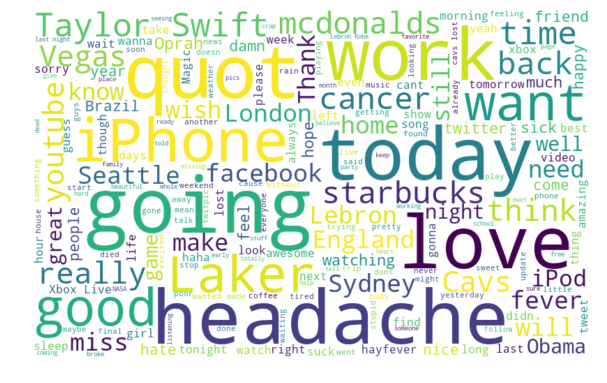

In [15]:
''' 
    Find out meaningful insights in tweets
        1) Common words used in the tweets using WordCloud
        2) Explore 0 Polarity words 
        3) Explore 4 Polarity words 
        4) Impact of Hashtags on tweets sentiment
'''

# 1) Visualize common words used in the tweets using WordCloud
all_words = ' '.join([text for text in twitter_dataset['tidy_tweets']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = "white", width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

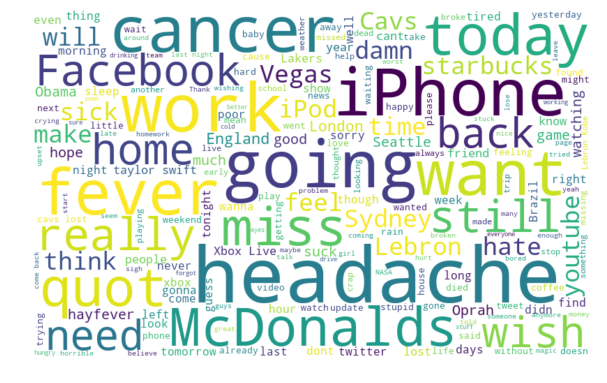

In [16]:
# 2) Visualize O polarity from the given dataset
_0_polarity =' '.join([text for text in twitter_dataset['tidy_tweets'][twitter_dataset['polarity'].astype(str).astype(int) == 0]])

wordcloud = WordCloud(background_color = "white", width=800, height=500, random_state=21, max_font_size=110).generate(_0_polarity)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

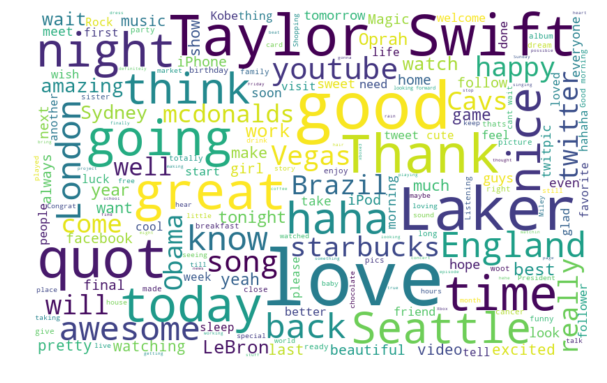

In [17]:
# 3) Visualize 4 polarity from the given dataset 
_4_polarity =' '.join([text for text in twitter_dataset['tidy_tweets'][twitter_dataset['polarity'].astype(str).astype(int) == 4]])

wordcloud = WordCloud(background_color = "white", width=800, height=500, random_state=21, max_font_size=110).generate(_4_polarity)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [18]:
# 4) impact of Hashtags on tweets sentiment
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [19]:
# Extracting hashtags from 0 Polarity Tweets
HT_regular = hashtag_extract(twitter_dataset['tidy_tweets'][twitter_dataset['polarity'].astype(str).astype(int) == 0])

# Extracting hashtags from 4 Polarity Tweets
HT_games = hashtag_extract(twitter_dataset['tidy_tweets'][twitter_dataset['polarity'].astype(str).astype(int) == 4])

In [20]:
# unnesting list
HT_regular = sum(HT_regular,[])
HT_games = sum(HT_games,[])

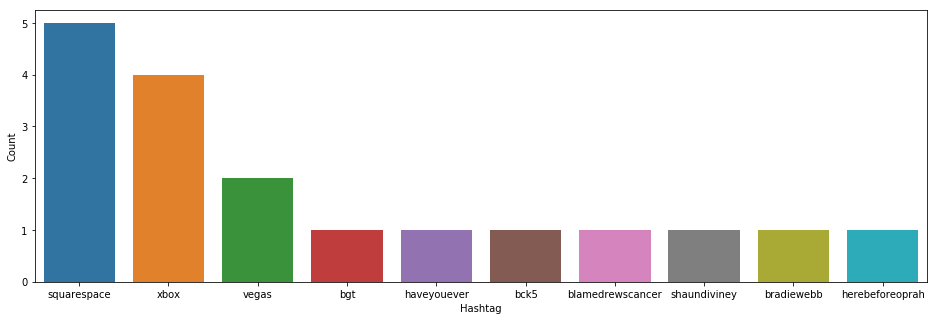

In [21]:
#  Plot the top 10 hashtags for Polarity 0
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

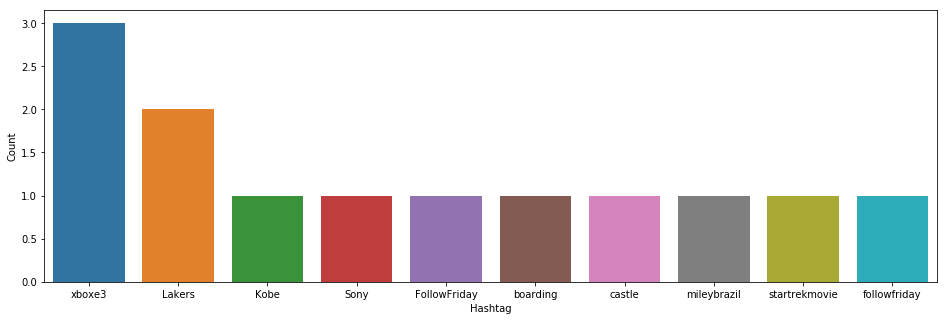

In [22]:
#  Plot the top 10 hashtags for Polarity 4
b = nltk.FreqDist(HT_games)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()
# As we saw 12 cell  xboxe3 appears in 3 times this pics depicts the same

In [23]:
# Now remove #Tag. No need to use Special character and meaning less words
twitter_dataset['tidy_tweets'] = np.vectorize(remove_pattern)(twitter_dataset['tidy_tweets'], hashtag)
twitter_dataset['tidy_tweets']

0                   angel going miss athlete this weekend
1       looks though Shaq getting traded Cleveland pla...
2                                APRIL COMING SOON ENOUGH
3       drinking McDonalds coffee understanding someon...
4           dissapointed Taylor Swift doesnt have Twitter
5       Wishes Spring Fling Tour with Dawn neecee Sigh...
6        sniffle kids hubby just left work Sydney weekend
7                only been sydney miss friends especially
8                                 xboxtweet working again
9                          lebron kobe puppet commercials
10      Allergies sucks sometimes Theres super adorabl...
11                                          broken iphone
12                    Line McDonalds long sausage biscuit
13      there virus going around congestion throw high...
14                                         scratched iPod
15                                      understand really
16      hero Love Wanna Brisvegas again sadly bank bal...
17      hate f

In [24]:
# Stemming - Removing the suffixes eg. “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.
from nltk.stem.porter import *
# Creating stemmer obj
stemmer = PorterStemmer()   

# Tokenization - for given sentence split into words  eg. ['good working night until'] --> good, working, night, until
tokenized_tweet = twitter_dataset['tidy_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0         [angel, going, miss, athlete, this, weekend]
1    [looks, though, Shaq, getting, traded, Clevela...
2                        [APRIL, COMING, SOON, ENOUGH]
3    [drinking, McDonalds, coffee, understanding, s...
4    [dissapointed, Taylor, Swift, doesnt, have, Tw...
Name: tidy_tweets, dtype: object

In [25]:
# After Stemmation 
stemmed_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x if not i in set(stopwords.words('english'))]) # stemming
stemmed_tweet.head()

0                   [angel, go, miss, athlet, weekend]
1    [look, though, shaq, get, trade, cleveland, pl...
2                          [april, come, soon, enough]
3    [drink, mcdonald, coffe, understand, someon, w...
4         [dissapoint, taylor, swift, doesnt, twitter]
Name: tidy_tweets, dtype: object

In [26]:
# Integrate stemmed tokens  into our twitter_dataset dataframe
for i in range(len(stemmed_tweet)):
    stemmed_tweet[i] = ' '.join(stemmed_tweet[i])
    
twitter_dataset['tidy_tweets'] = stemmed_tweet
twitter_dataset['tidy_tweets']

0                            angel go miss athlet weekend
1       look though shaq get trade cleveland play lebr...
2                                  april come soon enough
3       drink mcdonald coffe understand someon would h...
4                  dissapoint taylor swift doesnt twitter
5           wish spring fling tour dawn neece sigh knight
6               sniffl kid hubbi left work sydney weekend
7                               sydney miss friend especi
8                                          xboxtweet work
9                             lebron kobe puppet commerci
10      allergi suck sometim there super ador month be...
11                                           broken iphon
12                      line mcdonald long sausag biscuit
13                viru go around congest throw high fever
14                                           scratch ipod
15                                      understand realli
16        hero love wanna brisvega sadli bank balanc wont
17            

In [27]:
# Remove Old tweets column 
del twitter_dataset['tweets']
twitter_dataset.head()

,id,polarity,tidy_tweets
0,1467933112,0,angel go miss athlet weekend
1,2323395086,0,look though shaq get trade cleveland play lebr...
2,1467968979,0,april come soon enough
3,1990283756,0,drink mcdonald coffe understand someon would h...
4,1988884918,0,dissapoint taylor swift doesnt twitter


In [28]:
# Get the New cleaned.csv by executing below line and ready for Bag of Word, TF-IDF Model
twitter_dataset.to_csv('cleaned.csv', index=False) # writing data to a CSV file